In [1]:
from dotenv import load_dotenv
import os
import json
load_dotenv(override=True)

import time
from datetime import datetime 
from collections import defaultdict


In [2]:
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")

In [3]:
# connect to db
import mysql.connector

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user=USER,
  password=PASSWORD,
  database="mpp21"
)

mycursor = mydb.cursor()

In [4]:
def select_tone(curs, db):
    #, tone_result
    curs.execute("""SELECT article_id, tone, date
                FROM articles 
                WHERE is_privacy = 'privacy'
                """)
    
    arts = {}
    result = curs.fetchall()
    ctr = 0
    for r in result:
        arts[ctr] = {
            "tone": json.loads(r[1]),
            "date": r[2]
            #"tone_result": json.loads(r[2])
        }
        ctr += 1
    
    return arts

In [5]:
articles = select_tone(mycursor, mydb)
len(articles)

26706

In [6]:
tones = defaultdict(lambda: 0)
for a in articles.keys():
    for tone in articles[a]["tone"].keys():
        tones[tone] += 1


In [7]:
tones_likely = defaultdict(lambda: 0)
for a in articles.keys():
    for tone in articles[a]["tone"].keys():
        if articles[a]["tone"][tone] > 0.75:
            tones_likely[tone] += 1


In [19]:
tones_likely

defaultdict(<function __main__.<lambda>()>,
            {'analytical': 8758,
             'anger': 70,
             'confident': 123,
             'fear': 12,
             'joy': 184,
             'sadness': 36,
             'tentative': 1936})

In [11]:
def select_joy(curs, db):
    #, tone_result
    curs.execute("""SELECT article_id, tone
                FROM articles 
                WHERE is_privacy = 'privacy'
                """)
    
    arts = {}
    result = curs.fetchall()
    for r in result:
        arts[r[0]] = {
            "tone": json.loads(r[1]),
            #"tone_result": json.loads(r[2])
        }
        
    return arts

In [31]:
import random

In [35]:
joys = select_joy(mycursor, mydb)

In [67]:
joys_samples = {}

for a in joys.keys():
    for k, v in joys[a]["tone"].items():
        if k == "tentative" and v > 0.75:
            joys_samples[a] = v

In [68]:
random.choice(list(joys_samples.keys()))

'TDP_1917'

In [55]:
max(joys_samples.values())

0.948075

In [28]:
print([k for k,v in joys_samples.items() if v == max(joys_samples.values())])

['NZH_7826']


In [8]:
articles[500]

{'date': datetime.date(2018, 12, 12),
 'tone': {'analytical': 0.808019, 'joy': 0.591066}}

In [9]:
import time
from datetime import datetime, timedelta
import csv
import pandas as pd

In [10]:
def group_by_month(ds, t):
    
    group = defaultdict(lambda: 0)
    
    for m in range(len(months)): # for each month
        
        for i in ds.keys(): # for each date

            if ds[i] >= months[m][1] and ds[i] <= months[m][2]: # if date within given month
                if t in articles[i]["tone"]: # if tone in tones
                    group[m] += 1
        
    return group


In [11]:
tones_only = {}
dates_only = {}

for a in articles.keys():
    tones_only[a] = articles[a]["tone"]
    dates_only[a] = articles[a]["date"]

In [12]:
tone_names = ["analytical", "anger", "confident", "fear", "joy", "sadness", "tentative"]

In [16]:
month_groups = {}

for t in tone_names:
    month_groups[t] = group_by_month(dates_only, t)

In [17]:
# test
sum(month_groups["anger"].values())

3314

In [18]:
month_xs = [i[0] for i in months]
# month_ys = {}

# for n in newspapers.keys():
#     month_ys[n] = [month_groups[n][i[0]] for i in months]

In [18]:
# group all articles by months
# for each month get tone distribution
# are certain events triggering certain tones?

In [48]:
# def group_by_month_all(ds):
    
#     group = defaultdict(lambda: 0)
    
#     for m in range(len(months)): # for each month
        
#         for i in ds.keys(): # for each date

#             if ds[i] >= months[m][1] and ds[i] <= months[m][2]: # if date within given month
#                 #if t in articles[i]["tone"]: # if tone in tones
#                 group[m] += 1
        
#     return group

In [47]:
#by_month = group_by_month_all(dates_only) # group all by month

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [19]:
emotional_tones = ["anger", "fear", "sadness", "joy"]
language_tones = ["analytical", "confident", "tentative"]

In [20]:
tone_distribution_per_month = {}
tone_distribution_per_month_prc = {}

for m in range(len(months)):
    tone_distribution_per_month[m] = {}
    tone_distribution_per_month_prc[m] = {}
    
    for t in emotional_tones:
        tone_distribution_per_month[m][t] = month_groups[t][m]
    
    for t in emotional_tones:
        tone_distribution_per_month_prc[m][t] = round(tone_distribution_per_month[m][t] * 100 / sum(tone_distribution_per_month[m].values()), 2)

In [21]:
angers = [tone_distribution_per_month_prc[i]["anger"] for i in tone_distribution_per_month_prc.keys()]
fears = [tone_distribution_per_month_prc[i]["fear"] for i in tone_distribution_per_month_prc.keys()]
joys = [tone_distribution_per_month_prc[i]["joy"] for i in tone_distribution_per_month_prc.keys()]
sadnesses = [tone_distribution_per_month_prc[i]["sadness"] for i in tone_distribution_per_month_prc.keys()]


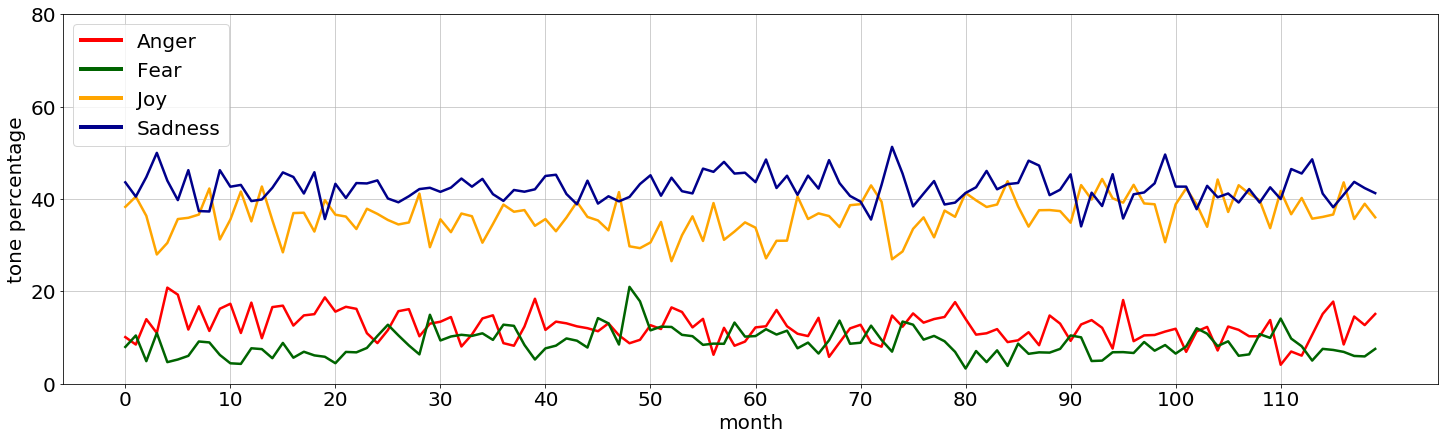

In [24]:
fig,ax = plt.subplots(figsize=(20, 6), constrained_layout=True)

plt.plot(month_xs, angers, color="red", alpha=1, linewidth=2.5)
plt.plot(month_xs, fears, color="darkgreen", alpha=1, linewidth=2.5)
plt.plot(month_xs, joys, color="orange", alpha=1, linewidth=2.5)
plt.plot(month_xs, sadnesses, color="darkblue", alpha=1, linewidth=2.5)

 
max_y = 100
#max_y = max(max(month_ys[country[0]]), max(month_ys[country[1]])) + 10

# plot and annotate dates
# snowden = get_month_for_date(datetime.date(datetime(2013,6,6)))
# plt.axvline(snowden, 0, linestyle=":", 
#             color=colors["line"], linewidth=2)
# ax.annotate(" First media report\n in the Snowden revelations", 
#             [snowden, max_y - 50], fontsize=18)#, fontweight="bold")

# cambridge_analytica = get_month_for_date(datetime.date(datetime(2018,3,1)))
# plt.axvline(cambridge_analytica, 0, linestyle=":", 
#             color=colors["line"], linewidth=2)
# ax.annotate(" First media report\n on the Facebook-Cambridge\n Analytica data scandal", 
#             [cambridge_analytica, max_y - 70], fontsize=18)#, fontweight="bold")

# gdpr_1 = get_month_for_date(datetime.date(datetime(2016, 4, 14)))
# plt.axvline(gdpr_1, 0, linestyle=":", 
#             color=colors["line"], linewidth=2)
# ax.annotate(" GDPR Announcement", 
#             [gdpr_1, max_y - 40], fontsize=18)#, fontweight="bold")

# gdpr_2 = get_month_for_date(datetime.date(datetime(2018, 5, 25)))
# plt.axvline(gdpr_2, 0, linestyle=":", color=colors["line"], linewidth=2)
# ax.annotate(" GDPR Implementation", 
#             [gdpr_2, max_y - 90], fontsize=18)#, fontweight="bold")

ax.set_xticks(range(0, 120, 10))
ax.set_xlabel('month', fontsize=20)
ax.set_xticklabels(range(0, 120, 10), fontsize=20)

ax.set_ylabel("tone percentage", fontsize=20)
ax.set_yticks(range(0, 100, 20))
ax.set_yticklabels(range(0, 100, 20), fontsize=20)
# ax.set_xticklabels(epochs, fontsize=20) 
legend = ax.legend(["Anger", "Fear","Joy", "Sadness"], loc=2, fontsize=20)
#ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=6))
#ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b%y"))

for line in legend.get_lines():
    line.set_linewidth(4.0)
plt.grid(alpha=0.75)
plt.show()

# EMOTIONAL TONE BY NEWSPAPER

In [25]:
def select_tone_by_newspaper(curs, db, n):
    
    curs.execute("""SELECT tone
                FROM articles 
                WHERE is_privacy = 'privacy'
                AND newspaper = '"""+ n +"""'
                """)
    
    arts = []
    result = curs.fetchall()
    
    for r in result:
        arts.append(json.loads(r[0]))

    return arts
    

In [26]:
newspapers = {}

with open('./newspapers-collected.csv', 'r') as f:
        reader = csv.reader(f)
        for r in reader:
            newspapers[r[0]] = r[1]

In [27]:
newspaper_tones = {}
newspaper_emotional_tones = {}
newspaper_language_tones = {}

for n in newspapers.keys():
    newspaper_tones[n] = select_tone_by_newspaper(mycursor, mydb, n)
    
for n in newspapers.keys():
    newspaper_emotional_tones[n] = defaultdict(lambda: 0)
    for i in newspaper_tones[n]:
        for t in emotional_tones:
            if t in i:
                newspaper_emotional_tones[n][t] += 1
                
    newspaper_language_tones[n] = defaultdict(lambda: 0)
    for i in newspaper_tones[n]:
        for t in language_tones:
            if t in i:
                newspaper_language_tones[n][t] += 1

In [28]:
newspaper_emotional_tones_prc = {}
newspaper_language_tones_prc = {}

for n in newspapers.keys():
    newspaper_emotional_tones_prc[n] = {}
    for t in emotional_tones:
        newspaper_emotional_tones_prc[n][t] = round(newspaper_emotional_tones[n][t] * 100 / sum(newspaper_emotional_tones[n].values()), 2)
 
for n in newspapers.keys():
    newspaper_language_tones_prc[n] = {}
    for t in language_tones:
        newspaper_language_tones_prc[n][t] = round(newspaper_language_tones[n][t] * 100 / sum(newspaper_language_tones[n].values()), 2)
  

In [ ]:
ax.barh((pos-step+width_bar + ct) / 2 + 0.75, data[n]["joy"], width_bar, facecolor=colors_tone["joy"], edgecolor='w', linewidth=1)
ax.barh((pos-step+width_bar + ct) / 2 + 0.75, data[n]["sadness"], width_bar, facecolor=colors_tone["sadness"], edgecolor='w', linewidth=1, left = data[n]["joy"])
ax.barh((pos-step+width_bar + ct) / 2 + 0.75, data[n]["fear"], width_bar, facecolor=colors_tone["fear"], edgecolor='w', linewidth=1, left = data[n]["joy"] + data[n]["sadness"]) 
ax.barh((pos-step+width_bar + ct) / 2 + 0.75, data[n]["anger"], width_bar, facecolor=colors_tone["anger"], edgecolor='w', linewidth=1, left = data[n]["joy"] + data[n]["sadness"] + data[n]["fear"]) 
ax.barh((pos-step+width_bar + ct) / 2 + 0.75, data[n]["unclassified"], width_bar, facecolor=colors_tone["unclassified"], edgecolor='w', linewidth=1, left = data[n]["joy"] + data[n]["sadness"] + data[n]["fear"] + data[n]["anger"]) 

In [29]:
import numpy as np

In [173]:
newspaper_names = [    
    "USA Today",
    "The New York Times",
    "The Daily Telegraph",
    "The Guardian",
    "The New Zealand Herald",
    "The Dominion Post",
    "The Toronto Star",
    "The Globe and Mail",
    "The Sydney Morning Herald",
    "Australian Financial Review"
]

newspapers_keys = ["USA", "NYT", "DT", "TG", "NZH", "TDP", "TS", "GM", "SMH", "AFR"]

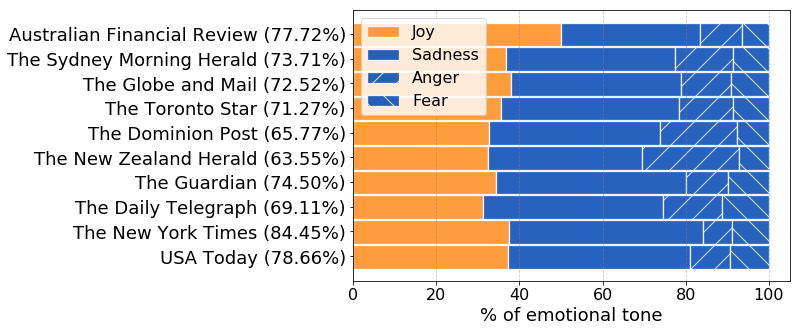

In [225]:
fig,ax = plt.subplots(figsize=(11, 4.5), constrained_layout=True)

whb = 4.8 #0.5
whs = 1

n_measure = 10
n_people = 1

#some calculation to determine the position of Y ticks labels
total_space = n_people*(n_measure*whb)+(n_people-1)*whs
ind_space = n_measure*whb
step = ind_space/2.
pos = np.arange(step, total_space+whs, ind_space+whs)

# create the figure and the axes to plot the data 
#fig = plt.figure(figsize=(12,6))
#ax = fig.add_axes([0.15, 0.15, 0.85, 0.65])
    
d = newspaper_emotional_tones_prc
ctr = 0
# hatches {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
for n in newspapers_keys: #sorted(newspapers.keys())
    ax.barh((pos-step+whb + ctr) / 2 + 0.5, d[n]["joy"], whb, 
            facecolor="#ff8c1a", edgecolor='w', linewidth=1.3, alpha=0.85)
    ax.barh((pos-step+whb + ctr) / 2 + 0.5, d[n]["sadness"], whb, left = d[n]["joy"],# hatch="/", 
            facecolor="#0047b3", edgecolor='w', linewidth=1.3, alpha=0.85)
    ax.barh((pos-step+whb + ctr) / 2 + 0.5, d[n]["anger"], whb, left = d[n]["joy"] + d[n]["sadness"], 
            facecolor="#0047b3", edgecolor='w', linewidth=1.3, alpha=0.85, hatch="/")
    ax.barh((pos-step+whb + ctr) / 2 + 0.5, d[n]["fear"], whb, left = d[n]["joy"] + d[n]["sadness"] + d[n]["anger"], 
            facecolor="#0047b3", edgecolor='w', linewidth=1.3, alpha=0.85, hatch="\\")

    ctr += 10

#d = newspaper_emotional_tones_prc["AFR"]

ax.set_yticks(range(3, 50, 5))
ax.set_xticks([0, 20, 40, 60, 80, 100])
# sorted(newspapers.keys()
ax.set_yticklabels([    
    "USA Today (78.66%)",
    "The New York Times (84.45%)",
    "The Daily Telegraph (69.11%)",
    "The Guardian (74.50%)",
    "The New Zealand Herald (63.55%)",
    "The Dominion Post (65.77%)",
    "The Toronto Star (71.27%)",
    "The Globe and Mail (72.52%)",
    "The Sydney Morning Herald (73.71%)",
    "Australian Financial Review (77.72%)"
], fontweight="normal", size=18)#, rotation=90)         
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontweight="normal", fontsize=16)#, rotation=90)         


#ax.set_ylabel('newspaper (% of articles with min. 1 tone)', {'size':15})
ax.set_xlabel('% of emotional tone', {'size':18})
ax.legend(("Joy", "Sadness", "Anger", "Fear"), loc=2, prop={'size': 16})
#plt.tick_params(labelsize=14)
plt.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.45, axis="x")
plt.show()


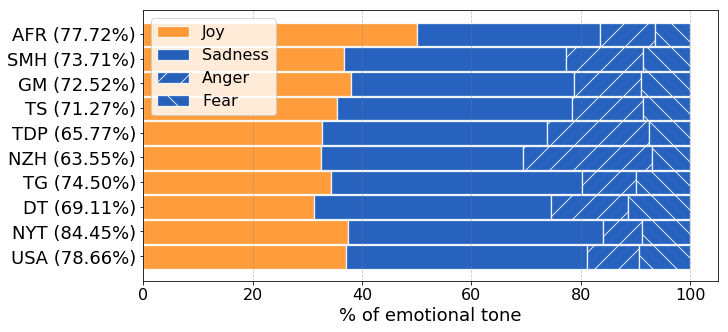

In [224]:
fig,ax = plt.subplots(figsize=(10, 4.5), constrained_layout=True)

whb = 4.8 #0.5
whs = 1

n_measure = 10
n_people = 1

#some calculation to determine the position of Y ticks labels
total_space = n_people*(n_measure*whb)+(n_people-1)*whs
ind_space = n_measure*whb
step = ind_space/2.
pos = np.arange(step, total_space+whs, ind_space+whs)

# create the figure and the axes to plot the data 
#fig = plt.figure(figsize=(12,6))
#ax = fig.add_axes([0.15, 0.15, 0.85, 0.65])
    
d = newspaper_emotional_tones_prc
ctr = 0
# hatches {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
for n in newspapers_keys: #sorted(newspapers.keys())
    ax.barh((pos-step+whb + ctr) / 2 + 0.5, d[n]["joy"], whb, 
            facecolor="#ff8c1a", edgecolor='w', linewidth=1.3, alpha=0.85)
    ax.barh((pos-step+whb + ctr) / 2 + 0.5, d[n]["sadness"], whb, left = d[n]["joy"],# hatch="/", 
            facecolor="#0047b3", edgecolor='w', linewidth=1.3, alpha=0.85)
    ax.barh((pos-step+whb + ctr) / 2 + 0.5, d[n]["anger"], whb, left = d[n]["joy"] + d[n]["sadness"], 
            facecolor="#0047b3", edgecolor='w', linewidth=1.3, alpha=0.85, hatch="/")
    ax.barh((pos-step+whb + ctr) / 2 + 0.5, d[n]["fear"], whb, left = d[n]["joy"] + d[n]["sadness"] + d[n]["anger"], 
            facecolor="#0047b3", edgecolor='w', linewidth=1.3, alpha=0.85, hatch="\\")

    ctr += 10

#d = newspaper_emotional_tones_prc["AFR"]

ax.set_yticks(range(3, 50, 5))
ax.set_xticks([0, 20, 40, 60, 80, 100])
# sorted(newspapers.keys()
ax.set_yticklabels([    
    "USA (78.66%)",
    "NYT (84.45%)",
    "DT (69.11%)",
    "TG (74.50%)",
    "NZH (63.55%)",
    "TDP (65.77%)",
    "TS (71.27%)",
    "GM (72.52%)",
    "SMH (73.71%)",
    "AFR (77.72%)"
], fontweight="normal", size=18)#, rotation=90)         
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontweight="normal", fontsize=16)#, rotation=90)         


#ax.set_ylabel('newspaper (% of articles with min. 1 tone)', {'size':15})
ax.set_xlabel('% of emotional tone', {'size':18})
ax.legend(("Joy", "Sadness", "Anger", "Fear"), loc=2, prop={'size': 16})
#plt.tick_params(labelsize=14)
plt.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.45, axis="x")
plt.show()


In [96]:
newspaper_emotional_tones_prc["AFR"]

{'anger': 10.01, 'fear': 6.47, 'joy': 50.06, 'sadness': 33.46}

In [138]:
# get articles with no emotional tone

# count emotional tones per article
emotional_tones_per_article = {}#[]#defaultdict(lambda: 0)

for n in newspapers.keys():
    emotional_tones_per_article[n] = []
    for a in newspaper_tones[n]:
        c = 0
        for t in emotional_tones:
            if t in a.keys():
                c += 1
        emotional_tones_per_article[n].append(c)     
        



In [146]:
no_tone = {}
with_tone = {}
for n in newspapers.keys():
    no_tone[n] = 0
    with_tone[n] = {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    }
    for i in emotional_tones_per_article[n]:
        if i == 0:
            no_tone[n] += 1
        else:
            with_tone[n][i] += 1
    

In [151]:
pd.DataFrame.from_dict(no_tone, orient="index")

,0
NYT,389
AFR,357
TS,947
NZH,1058
SMH,447
TG,1896
GM,624
DT,709
USA,315
TDP,420


In [152]:
pd.DataFrame.from_dict(with_tone).T

,1,2,3,4
AFR,910,308,26,1
DT,1060,449,73,4
GM,1138,443,64,2
NYT,1232,790,85,5
NZH,1331,450,57,7
SMH,875,334,42,2
TDP,603,179,24,1
TG,3472,1807,246,14
TS,1623,641,80,5
USA,751,365,40,5


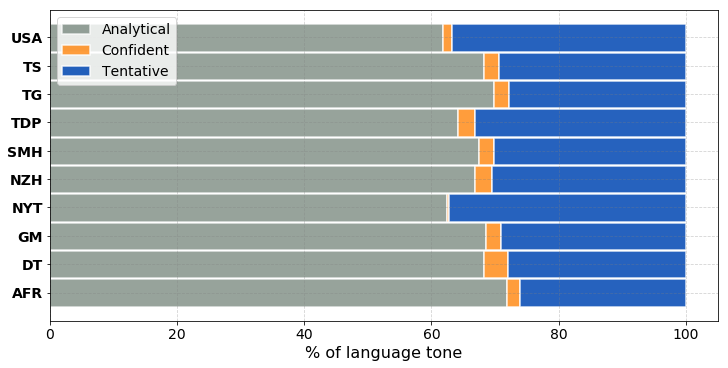

In [246]:
fig,ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

whb = 4.8 #0.5
whs = 1

n_measure = 10
n_people = 1

#some calculation to determine the position of Y ticks labels
total_space = n_people*(n_measure*whb)+(n_people-1)*whs
ind_space = n_measure*whb
step = ind_space/2.
pos = np.arange(step, total_space+whs, ind_space+whs)

# create the figure and the axes to plot the data 
#fig = plt.figure(figsize=(12,6))
#ax = fig.add_axes([0.15, 0.15, 0.85, 0.65])
    
d = newspaper_language_tones_prc
ctr = 0
# hatches {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
for n in sorted(newspapers.keys()):
    ax.barh((pos-step+whb + ctr) / 2 + 0.5, d[n]["analytical"], whb, 
            facecolor="#74847a", edgecolor='w', linewidth=1.5, alpha=0.75)
    ax.barh((pos-step+whb + ctr) / 2 + 0.5, d[n]["confident"], whb, left = d[n]["analytical"],# hatch="/", 
            facecolor="#ff8c1a", edgecolor='w', linewidth=1.5, alpha=0.85)
    ax.barh((pos-step+whb + ctr) / 2 + 0.5, d[n]["tentative"], whb, left = d[n]["analytical"] + d[n]["confident"], 
            facecolor="#0047b3", edgecolor='w', linewidth=1.5, alpha=0.85)
 
    ctr += 10

#d = newspaper_emotional_tones_prc["AFR"]

ax.set_yticks(range(3, 50, 5))
ax.set_yticklabels(sorted(newspapers.keys()), fontweight="bold", fontsize=14)#, rotation=90)         

ax.set_xlabel('% of language tone', {'size':16})
ax.legend(("Analytical", "Confident", "Tentative"), loc=2, prop={'size': 14})
plt.tick_params(labelsize=14)
plt.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.35)
plt.show()


{'AFR': {'anger': 10.01, 'fear': 6.47, 'joy': 50.06, 'sadness': 33.46},
 'DT': {'anger': 14.14, 'fear': 11.4, 'joy': 31.28, 'sadness': 43.18},
 'GM': {'anger': 12.14, 'fear': 9.04, 'joy': 38.04, 'sadness': 40.78},
 'NYT': {'anger': 7.06, 'fear': 8.81, 'joy': 37.51, 'sadness': 46.61},
 'NZH': {'anger': 23.54, 'fear': 7.08, 'joy': 32.43, 'sadness': 36.95},
 'SMH': {'anger': 14.07, 'fear': 8.59, 'joy': 36.79, 'sadness': 40.55},
 'TDP': {'anger': 18.51, 'fear': 7.62, 'joy': 32.69, 'sadness': 41.18},
 'TG': {'anger': 9.97, 'fear': 9.91, 'joy': 34.42, 'sadness': 45.7},
 'TS': {'anger': 13.05, 'fear': 8.59, 'joy': 35.51, 'sadness': 42.84},
 'USA': {'anger': 9.62, 'fear': 9.32, 'joy': 37.14, 'sadness': 43.92}}

In [70]:
# function to get month number of given date

def get_month_for_date(d):
    
    for m in months:
        if d >= m[1] and d <= m[2]:
            return(m[0])

In [71]:
colors = {
    "AFR": "#87111d", 
    "SMH": "darkblue",
    "NZH": "#87111d",
    "TDP": "darkblue", 
    "GM": "#87111d",
    "TS": "darkblue",
    "NYT": "#87111d",
    "USA": "darkblue",
    "TG": "#87111d",
    "DT": "darkblue",
    "line": "#87111d"
} ##87111d

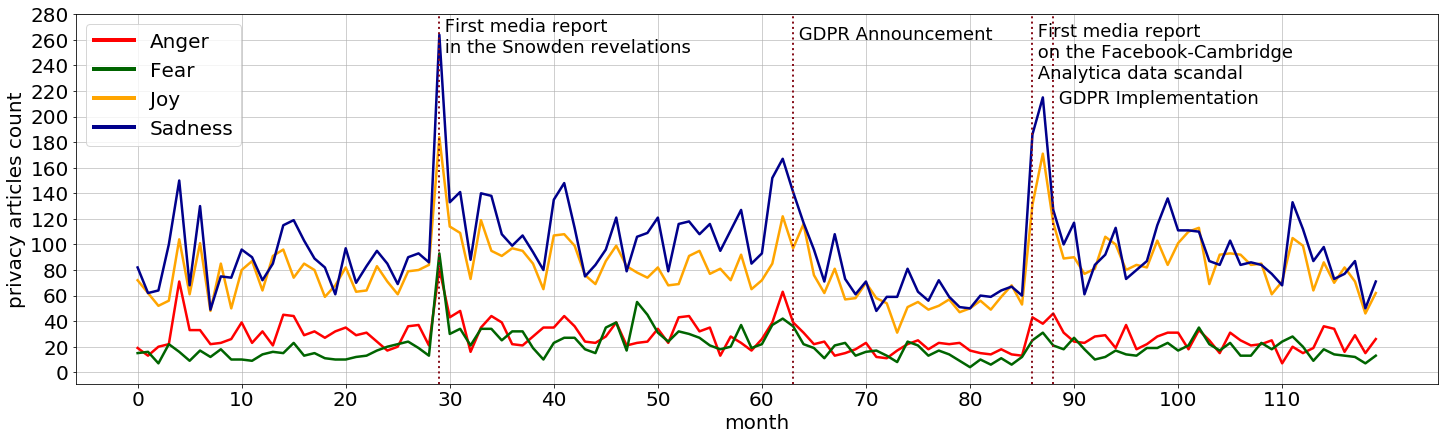

In [72]:
fig,ax = plt.subplots(figsize=(20, 6), constrained_layout=True)

plt.plot(month_xs, month_groups["anger"].values(), color="red", alpha=1, linewidth=2.5)
plt.plot(month_xs, month_groups["fear"].values(), color="darkgreen", alpha=1, linewidth=2.5)
plt.plot(month_xs, month_groups["joy"].values(), color="orange", alpha=1, linewidth=2.5)
plt.plot(month_xs, month_groups["sadness"].values(), color="darkblue", alpha=1, linewidth=2.5)

 
max_y = 300
#max_y = max(max(month_ys[country[0]]), max(month_ys[country[1]])) + 10

# plot and annotate dates
snowden = get_month_for_date(datetime.date(datetime(2013,6,6)))
plt.axvline(snowden, 0, linestyle=":", 
            color=colors["line"], linewidth=2)
ax.annotate(" First media report\n in the Snowden revelations", 
            [snowden, max_y - 50], fontsize=18)#, fontweight="bold")

cambridge_analytica = get_month_for_date(datetime.date(datetime(2018,3,1)))
plt.axvline(cambridge_analytica, 0, linestyle=":", 
            color=colors["line"], linewidth=2)
ax.annotate(" First media report\n on the Facebook-Cambridge\n Analytica data scandal", 
            [cambridge_analytica, max_y - 70], fontsize=18)#, fontweight="bold")

gdpr_1 = get_month_for_date(datetime.date(datetime(2016, 4, 14)))
plt.axvline(gdpr_1, 0, linestyle=":", 
            color=colors["line"], linewidth=2)
ax.annotate(" GDPR Announcement", 
            [gdpr_1, max_y - 40], fontsize=18)#, fontweight="bold")

gdpr_2 = get_month_for_date(datetime.date(datetime(2018, 5, 25)))
plt.axvline(gdpr_2, 0, linestyle=":", color=colors["line"], linewidth=2)
ax.annotate(" GDPR Implementation", 
            [gdpr_2, max_y - 90], fontsize=18)#, fontweight="bold")

ax.set_xticks(range(0, 120, 10))
ax.set_xlabel('month', fontsize=20)
ax.set_xticklabels(range(0, 120, 10), fontsize=20)

ax.set_ylabel("privacy articles count", fontsize=20)
ax.set_yticks(range(0, 300, 20))
ax.set_yticklabels(range(0, 300, 20), fontsize=20)
# ax.set_xticklabels(epochs, fontsize=20) 
legend = ax.legend(["Anger", "Fear","Joy", "Sadness"], loc=2, fontsize=20)
#ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=6))
#ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b%y"))

for line in legend.get_lines():
    line.set_linewidth(4.0)
plt.grid(alpha=0.75)
plt.show()

In [15]:
# group per month
# week is more natural progression though, but let's see

months = [
    # 2011
    (0, datetime.date(datetime(2011, 1, 1)), datetime.date(datetime(2011, 1, 31))),
    (1, datetime.date(datetime(2011, 2, 1)), datetime.date(datetime(2011, 2, 28))),
    (2, datetime.date(datetime(2011, 3, 1)), datetime.date(datetime(2011, 3, 31))),
    (3, datetime.date(datetime(2011, 4, 1)), datetime.date(datetime(2011, 4, 30))),
    (4, datetime.date(datetime(2011, 5, 1)), datetime.date(datetime(2011, 5, 31))),
    (5, datetime.date(datetime(2011, 6, 1)), datetime.date(datetime(2011, 6, 30))),
    (6, datetime.date(datetime(2011, 7, 1)), datetime.date(datetime(2011, 7, 31))),
    (7, datetime.date(datetime(2011, 8, 1)), datetime.date(datetime(2011, 8, 31))),
    (8, datetime.date(datetime(2011, 9, 1)), datetime.date(datetime(2011, 9, 30))),
    (9, datetime.date(datetime(2011, 10, 1)), datetime.date(datetime(2011, 10, 31))),
    (10, datetime.date(datetime(2011, 11, 1)), datetime.date(datetime(2011, 11, 30))),
    (11, datetime.date(datetime(2011, 12, 1)), datetime.date(datetime(2011, 12, 31))), 
    # 2012
    (12, datetime.date(datetime(2012, 1, 1)), datetime.date(datetime(2012, 1, 31))),
    (13, datetime.date(datetime(2012, 2, 1)), datetime.date(datetime(2012, 2, 29))),
    (14, datetime.date(datetime(2012, 3, 1)), datetime.date(datetime(2012, 3, 31))),
    (15, datetime.date(datetime(2012, 4, 1)), datetime.date(datetime(2012, 4, 30))),
    (16, datetime.date(datetime(2012, 5, 1)), datetime.date(datetime(2012, 5, 31))),
    (17, datetime.date(datetime(2012, 6, 1)), datetime.date(datetime(2012, 6, 30))),
    (18, datetime.date(datetime(2012, 7, 1)), datetime.date(datetime(2012, 7, 31))),
    (19, datetime.date(datetime(2012, 8, 1)), datetime.date(datetime(2012, 8, 31))),
    (20, datetime.date(datetime(2012, 9, 1)), datetime.date(datetime(2012, 9, 30))),
    (21, datetime.date(datetime(2012, 10, 1)), datetime.date(datetime(2012, 10, 31))),
    (22, datetime.date(datetime(2012, 11, 1)), datetime.date(datetime(2012, 11, 30))),
    (23, datetime.date(datetime(2012, 12, 1)), datetime.date(datetime(2012, 12, 31))), # year
    # 2013
    (24, datetime.date(datetime(2013, 1, 1)), datetime.date(datetime(2013, 1, 31))),
    (25, datetime.date(datetime(2013, 2, 1)), datetime.date(datetime(2013, 2, 28))),
    (26, datetime.date(datetime(2013, 3, 1)), datetime.date(datetime(2013, 3, 31))),
    (27, datetime.date(datetime(2013, 4, 1)), datetime.date(datetime(2013, 4, 30))),
    (28, datetime.date(datetime(2013, 5, 1)), datetime.date(datetime(2013, 5, 31))),
    (29, datetime.date(datetime(2013, 6, 1)), datetime.date(datetime(2013, 6, 30))),
    (30, datetime.date(datetime(2013, 7, 1)), datetime.date(datetime(2013, 7, 31))),
    (31, datetime.date(datetime(2013, 8, 1)), datetime.date(datetime(2013, 8, 31))),
    (32, datetime.date(datetime(2013, 9, 1)), datetime.date(datetime(2013, 9, 30))),
    (33, datetime.date(datetime(2013, 10, 1)), datetime.date(datetime(2013, 10, 31))),
    (34, datetime.date(datetime(2013, 11, 1)), datetime.date(datetime(2013, 11, 30))),
    (35, datetime.date(datetime(2013, 12, 1)), datetime.date(datetime(2013, 12, 31))), # year
    # 2014
    (36, datetime.date(datetime(2014, 1, 1)), datetime.date(datetime(2014, 1, 31))),
    (37, datetime.date(datetime(2014, 2, 1)), datetime.date(datetime(2014, 2, 28))),
    (38, datetime.date(datetime(2014, 3, 1)), datetime.date(datetime(2014, 3, 31))),
    (39, datetime.date(datetime(2014, 4, 1)), datetime.date(datetime(2014, 4, 30))),
    (40, datetime.date(datetime(2014, 5, 1)), datetime.date(datetime(2014, 5, 31))),
    (41, datetime.date(datetime(2014, 6, 1)), datetime.date(datetime(2014, 6, 30))),
    (42, datetime.date(datetime(2014, 7, 1)), datetime.date(datetime(2014, 7, 31))),
    (43, datetime.date(datetime(2014, 8, 1)), datetime.date(datetime(2014, 8, 31))),
    (44, datetime.date(datetime(2014, 9, 1)), datetime.date(datetime(2014, 9, 30))),
    (45, datetime.date(datetime(2014, 10, 1)), datetime.date(datetime(2014, 10, 31))),
    (46, datetime.date(datetime(2014, 11, 1)), datetime.date(datetime(2014, 11, 30))),
    (47, datetime.date(datetime(2014, 12, 1)), datetime.date(datetime(2014, 12, 31))),
    # 2015
    (48, datetime.date(datetime(2015, 1, 1)), datetime.date(datetime(2015, 1, 31))),
    (49, datetime.date(datetime(2015, 2, 1)), datetime.date(datetime(2015, 2, 28))),
    (50, datetime.date(datetime(2015, 3, 1)), datetime.date(datetime(2015, 3, 31))),
    (51, datetime.date(datetime(2015, 4, 1)), datetime.date(datetime(2015, 4, 30))),
    (52, datetime.date(datetime(2015, 5, 1)), datetime.date(datetime(2015, 5, 31))),
    (53, datetime.date(datetime(2015, 6, 1)), datetime.date(datetime(2015, 6, 30))),
    (54, datetime.date(datetime(2015, 7, 1)), datetime.date(datetime(2015, 7, 31))),
    (55, datetime.date(datetime(2015, 8, 1)), datetime.date(datetime(2015, 8, 31))),
    (56, datetime.date(datetime(2015, 9, 1)), datetime.date(datetime(2015, 9, 30))),
    (57, datetime.date(datetime(2015, 10, 1)), datetime.date(datetime(2015, 10, 31))),
    (58, datetime.date(datetime(2015, 11, 1)), datetime.date(datetime(2015, 11, 30))),
    (59, datetime.date(datetime(2015, 12, 1)), datetime.date(datetime(2015, 12, 31))),
    # 2016
    (60, datetime.date(datetime(2016, 1, 1)), datetime.date(datetime(2016, 1, 31))),
    (61, datetime.date(datetime(2016, 2, 1)), datetime.date(datetime(2016, 2, 29))),
    (62, datetime.date(datetime(2016, 3, 1)), datetime.date(datetime(2016, 3, 31))),
    (63, datetime.date(datetime(2016, 4, 1)), datetime.date(datetime(2016, 4, 30))),
    (64, datetime.date(datetime(2016, 5, 1)), datetime.date(datetime(2016, 5, 31))),
    (65, datetime.date(datetime(2016, 6, 1)), datetime.date(datetime(2016, 6, 30))),
    (66, datetime.date(datetime(2016, 7, 1)), datetime.date(datetime(2016, 7, 31))),
    (67, datetime.date(datetime(2016, 8, 1)), datetime.date(datetime(2016, 8, 31))),
    (68, datetime.date(datetime(2016, 9, 1)), datetime.date(datetime(2016, 9, 30))),
    (69, datetime.date(datetime(2016, 10, 1)), datetime.date(datetime(2016, 10, 31))),
    (70, datetime.date(datetime(2016, 11, 1)), datetime.date(datetime(2016, 11, 30))),
    (71, datetime.date(datetime(2016, 12, 1)), datetime.date(datetime(2016, 12, 31))), 
    # 2017
    (72, datetime.date(datetime(2017, 1, 1)), datetime.date(datetime(2017, 1, 31))),
    (73, datetime.date(datetime(2017, 2, 1)), datetime.date(datetime(2017, 2, 28))),
    (74, datetime.date(datetime(2017, 3, 1)), datetime.date(datetime(2017, 3, 31))),
    (75, datetime.date(datetime(2017, 4, 1)), datetime.date(datetime(2017, 4, 30))),
    (76, datetime.date(datetime(2017, 5, 1)), datetime.date(datetime(2017, 5, 31))),
    (77, datetime.date(datetime(2017, 6, 1)), datetime.date(datetime(2017, 6, 30))),
    (78, datetime.date(datetime(2017, 7, 1)), datetime.date(datetime(2017, 7, 31))),
    (79, datetime.date(datetime(2017, 8, 1)), datetime.date(datetime(2017, 8, 31))),
    (80, datetime.date(datetime(2017, 9, 1)), datetime.date(datetime(2017, 9, 30))),
    (81, datetime.date(datetime(2017, 10, 1)), datetime.date(datetime(2017, 10, 31))),
    (82, datetime.date(datetime(2017, 11, 1)), datetime.date(datetime(2017, 11, 30))),
    (83, datetime.date(datetime(2017, 12, 1)), datetime.date(datetime(2017, 12, 31))),
    # 2018
    (84, datetime.date(datetime(2018, 1, 1)), datetime.date(datetime(2018, 1, 31))),
    (85, datetime.date(datetime(2018, 2, 1)), datetime.date(datetime(2018, 2, 28))),
    (86, datetime.date(datetime(2018, 3, 1)), datetime.date(datetime(2018, 3, 31))),
    (87, datetime.date(datetime(2018, 4, 1)), datetime.date(datetime(2018, 4, 30))),
    (88, datetime.date(datetime(2018, 5, 1)), datetime.date(datetime(2018, 5, 31))),
    (89, datetime.date(datetime(2018, 6, 1)), datetime.date(datetime(2018, 6, 30))),
    (90, datetime.date(datetime(2018, 7, 1)), datetime.date(datetime(2018, 7, 31))),
    (91, datetime.date(datetime(2018, 8, 1)), datetime.date(datetime(2018, 8, 31))),
    (92, datetime.date(datetime(2018, 9, 1)), datetime.date(datetime(2018, 9, 30))),
    (93, datetime.date(datetime(2018, 10, 1)), datetime.date(datetime(2018, 10, 31))),
    (94, datetime.date(datetime(2018, 11, 1)), datetime.date(datetime(2018, 11, 30))),
    (95, datetime.date(datetime(2018, 12, 1)), datetime.date(datetime(2018, 12, 31))),
    # 2019
    (96, datetime.date(datetime(2019, 1, 1)), datetime.date(datetime(2019, 1, 31))),
    (97, datetime.date(datetime(2019, 2, 1)), datetime.date(datetime(2019, 2, 28))),
    (98, datetime.date(datetime(2019, 3, 1)), datetime.date(datetime(2019, 3, 31))),
    (99, datetime.date(datetime(2019, 4, 1)), datetime.date(datetime(2019, 4, 30))),
    (100, datetime.date(datetime(2019, 5, 1)), datetime.date(datetime(2019, 5, 31))),
    (101, datetime.date(datetime(2019, 6, 1)), datetime.date(datetime(2019, 6, 30))),
    (102, datetime.date(datetime(2019, 7, 1)), datetime.date(datetime(2019, 7, 31))),
    (103, datetime.date(datetime(2019, 8, 1)), datetime.date(datetime(2019, 8, 31))),
    (104, datetime.date(datetime(2019, 9, 1)), datetime.date(datetime(2019, 9, 30))),
    (105, datetime.date(datetime(2019, 10, 1)), datetime.date(datetime(2019, 10, 31))),
    (106, datetime.date(datetime(2019, 11, 1)), datetime.date(datetime(2019, 11, 30))),
    (107, datetime.date(datetime(2019, 12, 1)), datetime.date(datetime(2019, 12, 31))), 
    # 2020
    (108, datetime.date(datetime(2020, 1, 1)), datetime.date(datetime(2020, 1, 31))),
    (109, datetime.date(datetime(2020, 2, 1)), datetime.date(datetime(2020, 2, 29))),
    (110, datetime.date(datetime(2020, 3, 1)), datetime.date(datetime(2020, 3, 31))),
    (111, datetime.date(datetime(2020, 4, 1)), datetime.date(datetime(2020, 4, 30))),
    (112, datetime.date(datetime(2020, 5, 1)), datetime.date(datetime(2020, 5, 31))),
    (113, datetime.date(datetime(2020, 6, 1)), datetime.date(datetime(2020, 6, 30))),
    (114, datetime.date(datetime(2020, 7, 1)), datetime.date(datetime(2020, 7, 31))),
    (115, datetime.date(datetime(2020, 8, 1)), datetime.date(datetime(2020, 8, 31))),
    (116, datetime.date(datetime(2020, 9, 1)), datetime.date(datetime(2020, 9, 30))),
    (117, datetime.date(datetime(2020, 10, 1)), datetime.date(datetime(2020, 10, 31))),
    (118, datetime.date(datetime(2020, 11, 1)), datetime.date(datetime(2020, 11, 30))),
    (119, datetime.date(datetime(2020, 12, 1)), datetime.date(datetime(2020, 12, 31)))  
    
    
]

